# INTRODUCTION TO NLP

In [2]:
# SESSION 1 AND 2

In [ ]:
# pip install spacy
# import spacy
# from spacy.lang.en.examples import sentences
# pip install en_core_web_sm
# !python -m spacy download en_core_web_sm

In [59]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
#  creating a new instance of a blank English language model
nlp=spacy.load('en_core_web_sm')

In [61]:
type(nlp)

spacy.lang.en.English

In [62]:
# creates a structured document object
doc1=nlp('India, a South Asian nation, is the seventh-largest country by area, the second-most populous country with over 1.38 billion people, and the most populous democracy in the world. India boasts of an immensely rich cultural heritage, including numerous languages, traditions, and people. The country holds its uniqueness in its diversity, and hence has adapted itself to international changes with poise and comfort. While the economy has welcomed international companies to invest in it with open arms since liberalisation in the 1990s, Indians have been prudent and proactive in adopting global approaches and skills. Indian villagers have proudly taken up farming, advanced agriculture and unique handicrafts as their profession on one hand, while the modern industries and professional services sectors are coming up in a big way on the other.Thus, the country is attracting many global majors for strategic investments owing to the presence of a vast range of industries, investment avenues and a supportive Government. A huge population, mostly comprising the youth, is a strong driver for demand and an ample source of manpower.')

In [63]:
type(doc1)

spacy.tokens.doc.Doc

## CREATE A DATAFRAME:

In [458]:
text_s=nlp('We calculate the similarities between documents using the sim object and print the resulting similarity matrix. In this case, the output will be a 4x4 matrix, where each element represents the cosine similarity between two documents.Note that MatrixSimilarity can be used with other similarity measures besides cosine similarity by specifying a different num_best parameter. For example, setting num_best=1 will return the document with the highest similarity score.')

In [472]:
import pandas as pd

# Initialize an empty list to store the sentences
sentences = []

# Loop over each sentence in the document
for i, sent in enumerate(text_s.sents):
    # Append the sentence number and sentence text to the list
    sentences.append({'Sentence Number': i+1, 'Sentence Text': sent.text})

# Convert the list to a pandas DataFrame
sent_df = pd.DataFrame(sentences)

# Print the resulting DataFrame
print(sent_df)


   Sentence Number                                      Sentence Text
0                1  We calculate the similarities between document...
1                2  In this case, the output will be a 4x4 matrix,...
2                3  Note that MatrixSimilarity can be used with ot...
3                4  For example, setting num_best=1 will return th...


In [ ]:
## OR ###

In [459]:
type(text_s)

spacy.tokens.doc.Doc

In [475]:
doc_list = list(nlp.pipe([text_s]))
for doc1 in doc_list:
    for sentence in doc1.sents:
        print(sentence.text)

We calculate the similarities between documents using the sim object and print the resulting similarity matrix.
In this case, the output will be a 4x4 matrix, where each element represents the cosine similarity between two documents.
Note that MatrixSimilarity can be used with other similarity measures besides cosine similarity by specifying a different num_best parameter.
For example, setting num_best=1 will return the document with the highest similarity score.


In [476]:
# converting doc into a DF of sentences
# Create a list of sentences from the doc
sentences = [sent.text for sent in doc1.sents]

# Create a dictionary with the sentences as values and their indices as keys
data = {'sentence': sentences}

# Convert the dictionary to a pandas DataFrame
sent_df = pd.DataFrame.from_dict(data, orient='columns')

# Print the resulting DataFrame
print(sent_df)

token = []
pos = []
new_sent_df = sent_df
for sent in nlp.pipe(new_sent_df['sentence']):
    if sent.has_annotation('DEP'):
        token.append([word.text for word in sent] )
        pos.append([word.pos_ for word in sent])
        
print(token)
print(pos)

new_sent_df['Token']=token
new_sent_df['POS']=pos

new_sent_df


data = new_sent_df['sentence']

                                            sentence
0  We calculate the similarities between document...
1  In this case, the output will be a 4x4 matrix,...
2  Note that MatrixSimilarity can be used with ot...
3  For example, setting num_best=1 will return th...
[['We', 'calculate', 'the', 'similarities', 'between', 'documents', 'using', 'the', 'sim', 'object', 'and', 'print', 'the', 'resulting', 'similarity', 'matrix', '.'], ['In', 'this', 'case', ',', 'the', 'output', 'will', 'be', 'a', '4x4', 'matrix', ',', 'where', 'each', 'element', 'represents', 'the', 'cosine', 'similarity', 'between', 'two', 'documents', '.'], ['Note', 'that', 'MatrixSimilarity', 'can', 'be', 'used', 'with', 'other', 'similarity', 'measures', 'besides', 'cosine', 'similarity', 'by', 'specifying', 'a', 'different', 'num_best', 'parameter', '.'], ['For', 'example', ',', 'setting', 'num_best=1', 'will', 'return', 'the', 'document', 'with', 'the', 'highest', 'similarity', 'score', '.']]
[['PRON', 'VERB', 'DET', '

In [477]:
data

0    We calculate the similarities between document...
1    In this case, the output will be a 4x4 matrix,...
2    Note that MatrixSimilarity can be used with ot...
3    For example, setting num_best=1 will return th...
Name: sentence, dtype: object

In [ ]:
############

### TOKENIZATION

Tokenization is a fundamental task in natural language processing that involves splitting text into individual words or tokens. We tokenize text in order to make it easier to process and analyze, since we can then treat each token as a separate unit of meaning.

In summary, tokenization is a key preprocessing step in many natural language processing tasks that involves breaking down text into smaller, more manageable units. By doing so, we can more easily analyze and manipulate text, and prepare it for further processing and analysis.

In [64]:
for token in doc1:
    print(token)

India
,
a
South
Asian
nation
,
is
the
seventh
-
largest
country
by
area
,
the
second
-
most
populous
country
with
over
1.38
billion
people
,
and
the
most
populous
democracy
in
the
world
.
India
boasts
of
an
immensely
rich
cultural
heritage
,
including
numerous
languages
,
traditions
,
and
people
.
The
country
holds
its
uniqueness
in
its
diversity
,
and
hence
has
adapted
itself
to
international
changes
with
poise
and
comfort
.
While
the
economy
has
welcomed
international
companies
to
invest
in
it
with
open
arms
since
liberalisation
in
the
1990s
,
Indians
have
been
prudent
and
proactive
in
adopting
global
approaches
and
skills
.
Indian
villagers
have
proudly
taken
up
farming
,
advanced
agriculture
and
unique
handicrafts
as
their
profession
on
one
hand
,
while
the
modern
industries
and
professional
services
sectors
are
coming
up
in
a
big
way
on
the
other
.
Thus
,
the
country
is
attracting
many
global
majors
for
strategic
investments
owing
to
the
presence
of
a
vast
range
of
industries
,
in

### Number of tokens

In [65]:
# Count the number of tokens

t_count=0
for token in doc1:
    t_count=t_count+1
    print(token)
print('The no of tokens:',t_count)

India
,
a
South
Asian
nation
,
is
the
seventh
-
largest
country
by
area
,
the
second
-
most
populous
country
with
over
1.38
billion
people
,
and
the
most
populous
democracy
in
the
world
.
India
boasts
of
an
immensely
rich
cultural
heritage
,
including
numerous
languages
,
traditions
,
and
people
.
The
country
holds
its
uniqueness
in
its
diversity
,
and
hence
has
adapted
itself
to
international
changes
with
poise
and
comfort
.
While
the
economy
has
welcomed
international
companies
to
invest
in
it
with
open
arms
since
liberalisation
in
the
1990s
,
Indians
have
been
prudent
and
proactive
in
adopting
global
approaches
and
skills
.
Indian
villagers
have
proudly
taken
up
farming
,
advanced
agriculture
and
unique
handicrafts
as
their
profession
on
one
hand
,
while
the
modern
industries
and
professional
services
sectors
are
coming
up
in
a
big
way
on
the
other
.
Thus
,
the
country
is
attracting
many
global
majors
for
strategic
investments
owing
to
the
presence
of
a
vast
range
of
industries
,
in

In [66]:
len(doc1)

201

In [67]:
doc1[0]

India

In [68]:
doc1[:-1]

India, a South Asian nation, is the seventh-largest country by area, the second-most populous country with over 1.38 billion people, and the most populous democracy in the world. India boasts of an immensely rich cultural heritage, including numerous languages, traditions, and people. The country holds its uniqueness in its diversity, and hence has adapted itself to international changes with poise and comfort. While the economy has welcomed international companies to invest in it with open arms since liberalisation in the 1990s, Indians have been prudent and proactive in adopting global approaches and skills. Indian villagers have proudly taken up farming, advanced agriculture and unique handicrafts as their profession on one hand, while the modern industries and professional services sectors are coming up in a big way on the other.Thus, the country is attracting many global majors for strategic investments owing to the presence of a vast range of industries, investment avenues and a 

### STOP WORDS

In [69]:
# STOP WORDS:
from spacy.lang.en.stop_words import STOP_WORDS

In [70]:
print(STOP_WORDS)

{'how', 'so', 'hundred', 'a', 'on', 'has', "'d", 'else', 'seem', 'are', 'becoming', 'formerly', 'now', 'anyhow', 'name', 'eight', 'which', 'namely', 'noone', 'although', 'anyone', 'these', 'the', 'nowhere', 'thru', '‘re', 'she', 'because', 'your', 'into', 'unless', "n't", 'last', 'does', 'empty', 'nothing', 'before', 'four', 'us', 'together', 'still', 'hence', 'beyond', '‘ve', '’d', 'that', 'show', 'this', 'behind', 'too', '’ve', 'them', 'might', 'give', 'just', 're', 'became', 'becomes', 'quite', 'everywhere', 'n’t', 'meanwhile', 'myself', 'twelve', 'could', 'somehow', 'put', 'herein', 'go', 'off', 'all', 'indeed', 'between', 'do', 'few', 'keep', 'above', 'towards', 'whither', 'can', 'seemed', 'you', 'become', 'only', 'forty', 'along', 'than', 'more', 'one', 'below', 'whom', 'whole', 'seems', 'with', 'side', 'since', 'moreover', 'where', 'besides', 'their', 'those', 'may', 'former', 'no', 'latter', 'yourselves', 'during', 'anything', 'or', 'will', 'sometime', 'whether', 'ever', 'whenc

In [71]:
len(STOP_WORDS)

326

### Is it a stop word?

In [72]:
# Is it a stop word
for token in doc1:
    print(token,'==>',token.is_stop)

India ==> False
, ==> False
a ==> True
South ==> False
Asian ==> False
nation ==> False
, ==> False
is ==> True
the ==> True
seventh ==> False
- ==> False
largest ==> False
country ==> False
by ==> True
area ==> False
, ==> False
the ==> True
second ==> False
- ==> False
most ==> True
populous ==> False
country ==> False
with ==> True
over ==> True
1.38 ==> False
billion ==> False
people ==> False
, ==> False
and ==> True
the ==> True
most ==> True
populous ==> False
democracy ==> False
in ==> True
the ==> True
world ==> False
. ==> False
India ==> False
boasts ==> False
of ==> True
an ==> True
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> False
including ==> False
numerous ==> False
languages ==> False
, ==> False
traditions ==> False
, ==> False
and ==> True
people ==> False
. ==> False
The ==> True
country ==> False
holds ==> False
its ==> True
uniqueness ==> False
in ==> True
its ==> True
diversity ==> False
, ==> False
and ==> True
hence ==> True
h

In [104]:
# Find the no of stop words tokens in the doc1

stop_count=0
for token in doc1:
    if token.is_stop==True:
        print(token)
        stop_count=stop_count+1
print('The count of non-stop word tokens:',stop_count)

a
is
the
by
the
most
with
over
and
the
most
in
the
of
an
and
The
its
in
its
and
hence
has
itself
to
with
and
While
the
has
to
in
it
with
since
in
the
have
been
and
in
and
have
up
and
as
their
on
one
while
the
and
are
up
in
a
on
the
other
Thus
the
is
many
for
to
the
of
a
of
and
a
A
mostly
the
is
a
for
and
an
of
The count of non-stop word tokens: 80


In [105]:
# Count the no of non-stop words
s_count=0
for token in doc1:
    print(token,'==>',token.is_stop)
print('\n\n The non-stop words:\n')
for token in doc1:
    if token.is_stop==False:
        s_count=s_count+1
        print(token)
print('\n The count of non-stop words:',s_count)

India ==> False
, ==> False
a ==> True
South ==> False
Asian ==> False
nation ==> False
, ==> False
is ==> True
the ==> True
seventh ==> False
- ==> False
largest ==> False
country ==> False
by ==> True
area ==> False
, ==> False
the ==> True
second ==> False
- ==> False
most ==> True
populous ==> False
country ==> False
with ==> True
over ==> True
1.38 ==> False
billion ==> False
people ==> False
, ==> False
and ==> True
the ==> True
most ==> True
populous ==> False
democracy ==> False
in ==> True
the ==> True
world ==> False
. ==> False
India ==> False
boasts ==> False
of ==> True
an ==> True
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> False
including ==> False
numerous ==> False
languages ==> False
, ==> False
traditions ==> False
, ==> False
and ==> True
people ==> False
. ==> False
The ==> True
country ==> False
holds ==> False
its ==> True
uniqueness ==> False
in ==> True
its ==> True
diversity ==> False
, ==> False
and ==> True
hence ==> True
h

### Is it a punctuation?

In [109]:
# Count the no of non-punctations
np_count=0
for token in doc1:
    print(token,'==>',token.is_punct)
print('\n\n The non-punctuation words:\n')
for token in doc1:
    if token.is_punct==False:
        np_count=np_count+1
        print(token)
print('\n The count of non-punctuations:',np_count)

India ==> False
, ==> True
a ==> False
South ==> False
Asian ==> False
nation ==> False
, ==> True
is ==> False
the ==> False
seventh ==> False
- ==> True
largest ==> False
country ==> False
by ==> False
area ==> False
, ==> True
the ==> False
second ==> False
- ==> True
most ==> False
populous ==> False
country ==> False
with ==> False
over ==> False
1.38 ==> False
billion ==> False
people ==> False
, ==> True
and ==> False
the ==> False
most ==> False
populous ==> False
democracy ==> False
in ==> False
the ==> False
world ==> False
. ==> True
India ==> False
boasts ==> False
of ==> False
an ==> False
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> True
including ==> False
numerous ==> False
languages ==> False
, ==> True
traditions ==> False
, ==> True
and ==> False
people ==> False
. ==> True
The ==> False
country ==> False
holds ==> False
its ==> False
uniqueness ==> False
in ==> False
its ==> False
diversity ==> False
, ==> True
and ==> False
hence =

In [108]:
# Count the no of punctations
p_count=0
for token in doc1:
    print(token,'==>',token.is_punct)
print('\n\n The punctuation words:\n')
for token in doc1:
    if token.is_punct==True:
        p_count=p_count+1
        print(token)
print('\n The count of punctuations:',p_count)

India ==> False
, ==> True
a ==> False
South ==> False
Asian ==> False
nation ==> False
, ==> True
is ==> False
the ==> False
seventh ==> False
- ==> True
largest ==> False
country ==> False
by ==> False
area ==> False
, ==> True
the ==> False
second ==> False
- ==> True
most ==> False
populous ==> False
country ==> False
with ==> False
over ==> False
1.38 ==> False
billion ==> False
people ==> False
, ==> True
and ==> False
the ==> False
most ==> False
populous ==> False
democracy ==> False
in ==> False
the ==> False
world ==> False
. ==> True
India ==> False
boasts ==> False
of ==> False
an ==> False
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> True
including ==> False
numerous ==> False
languages ==> False
, ==> True
traditions ==> False
, ==> True
and ==> False
people ==> False
. ==> True
The ==> False
country ==> False
holds ==> False
its ==> False
uniqueness ==> False
in ==> False
its ==> False
diversity ==> False
, ==> True
and ==> False
hence =

### Is it a left punctuation?

In [110]:
# Count the no of left punctations
lp_count=0
for token in doc1:
    print(token,'==>',token.is_left_punct)
print('\n\n The punctuation words:\n')
for token in doc1:
    if token.is_left_punct==True:
        lp_count=lp_count+1
        print(token)
print('\n The count of left punctuations:',lp_count)

India ==> False
, ==> False
a ==> False
South ==> False
Asian ==> False
nation ==> False
, ==> False
is ==> False
the ==> False
seventh ==> False
- ==> False
largest ==> False
country ==> False
by ==> False
area ==> False
, ==> False
the ==> False
second ==> False
- ==> False
most ==> False
populous ==> False
country ==> False
with ==> False
over ==> False
1.38 ==> False
billion ==> False
people ==> False
, ==> False
and ==> False
the ==> False
most ==> False
populous ==> False
democracy ==> False
in ==> False
the ==> False
world ==> False
. ==> False
India ==> False
boasts ==> False
of ==> False
an ==> False
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> False
including ==> False
numerous ==> False
languages ==> False
, ==> False
traditions ==> False
, ==> False
and ==> False
people ==> False
. ==> False
The ==> False
country ==> False
holds ==> False
its ==> False
uniqueness ==> False
in ==> False
its ==> False
diversity ==> False
, ==> False
and ==> F

### Is it right punctuation?

In [111]:
# Count the no of right punctations
rp_count=0
for token in doc1:
    print(token,'==>',token.is_right_punct)
print('\n\n The right punctuation words:\n')
for token in doc1:
    if token.is_right_punct==True:
        rp_count=rp_count+1
        print(token)
print('\n The count of right punctuations:',rp_count)

India ==> False
, ==> False
a ==> False
South ==> False
Asian ==> False
nation ==> False
, ==> False
is ==> False
the ==> False
seventh ==> False
- ==> False
largest ==> False
country ==> False
by ==> False
area ==> False
, ==> False
the ==> False
second ==> False
- ==> False
most ==> False
populous ==> False
country ==> False
with ==> False
over ==> False
1.38 ==> False
billion ==> False
people ==> False
, ==> False
and ==> False
the ==> False
most ==> False
populous ==> False
democracy ==> False
in ==> False
the ==> False
world ==> False
. ==> False
India ==> False
boasts ==> False
of ==> False
an ==> False
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> False
including ==> False
numerous ==> False
languages ==> False
, ==> False
traditions ==> False
, ==> False
and ==> False
people ==> False
. ==> False
The ==> False
country ==> False
holds ==> False
its ==> False
uniqueness ==> False
in ==> False
its ==> False
diversity ==> False
, ==> False
and ==> F

### Is it an alphabet?

In [112]:
# Count the tokens, whcih are made of alphabets
a_count=0
for token in doc1:
    print(token,'==>',token.is_alpha)
print('\n\n The alphabets tokens:\n')
for token in doc1:
    if token.is_alpha==True:
        a_count=a_count+1
        print(token)
print('\n The count of alphabet-tokens:',a_count)

India ==> True
, ==> False
a ==> True
South ==> True
Asian ==> True
nation ==> True
, ==> False
is ==> True
the ==> True
seventh ==> True
- ==> False
largest ==> True
country ==> True
by ==> True
area ==> True
, ==> False
the ==> True
second ==> True
- ==> False
most ==> True
populous ==> True
country ==> True
with ==> True
over ==> True
1.38 ==> False
billion ==> True
people ==> True
, ==> False
and ==> True
the ==> True
most ==> True
populous ==> True
democracy ==> True
in ==> True
the ==> True
world ==> True
. ==> False
India ==> True
boasts ==> True
of ==> True
an ==> True
immensely ==> True
rich ==> True
cultural ==> True
heritage ==> True
, ==> False
including ==> True
numerous ==> True
languages ==> True
, ==> False
traditions ==> True
, ==> False
and ==> True
people ==> True
. ==> False
The ==> True
country ==> True
holds ==> True
its ==> True
uniqueness ==> True
in ==> True
its ==> True
diversity ==> True
, ==> False
and ==> True
hence ==> True
has ==> True
adapted ==> True
it

### Is it a Digit?

In [114]:
# Count the no of digits
d_count=0
for token in doc1:
    print(token,'==>',token.is_digit)
print('\n\n The digits:\n')
for token in doc1:
    if token.is_digit==True:
        d_count=d_count+1
        print(token)
print('\n The count of digits:',d_count)

India ==> False
, ==> False
a ==> False
South ==> False
Asian ==> False
nation ==> False
, ==> False
is ==> False
the ==> False
seventh ==> False
- ==> False
largest ==> False
country ==> False
by ==> False
area ==> False
, ==> False
the ==> False
second ==> False
- ==> False
most ==> False
populous ==> False
country ==> False
with ==> False
over ==> False
1.38 ==> False
billion ==> False
people ==> False
, ==> False
and ==> False
the ==> False
most ==> False
populous ==> False
democracy ==> False
in ==> False
the ==> False
world ==> False
. ==> False
India ==> False
boasts ==> False
of ==> False
an ==> False
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> False
including ==> False
numerous ==> False
languages ==> False
, ==> False
traditions ==> False
, ==> False
and ==> False
people ==> False
. ==> False
The ==> False
country ==> False
holds ==> False
its ==> False
uniqueness ==> False
in ==> False
its ==> False
diversity ==> False
, ==> False
and ==> F

### Is it Lower case?

In [91]:
# Count the no of lower case tokens
l_count=0
for token in doc1:
    print(token,'==>',token.is_lower)
print('\n\n The lower case words:\n')
for token in doc1:
    if token.is_lower==True:
        l_count=l_count+1
        print(token)
print('\n The count of lower case tokens:',l_count)

India ==> False
, ==> False
a ==> True
South ==> False
Asian ==> False
nation ==> True
, ==> False
is ==> True
the ==> True
seventh ==> True
- ==> False
largest ==> True
country ==> True
by ==> True
area ==> True
, ==> False
the ==> True
second ==> True
- ==> False
most ==> True
populous ==> True
country ==> True
with ==> True
over ==> True
1.38 ==> False
billion ==> True
people ==> True
, ==> False
and ==> True
the ==> True
most ==> True
populous ==> True
democracy ==> True
in ==> True
the ==> True
world ==> True
. ==> False
India ==> False
boasts ==> True
of ==> True
an ==> True
immensely ==> True
rich ==> True
cultural ==> True
heritage ==> True
, ==> False
including ==> True
numerous ==> True
languages ==> True
, ==> False
traditions ==> True
, ==> False
and ==> True
people ==> True
. ==> False
The ==> False
country ==> True
holds ==> True
its ==> True
uniqueness ==> True
in ==> True
its ==> True
diversity ==> True
, ==> False
and ==> True
hence ==> True
has ==> True
adapted ==> Tr

### Is it Upper Case?

In [92]:
# Count the no of upper case tokens
u_count=0
for token in doc1:
    print(token,'==>',token.is_upper)
print('\n\n The lower case words:\n')
for token in doc1:
    if token.is_upper==True:
        u_count=u_count+1
        print(token)
print('\n The count of upper case tokens:',u_count)

India ==> False
, ==> False
a ==> False
South ==> False
Asian ==> False
nation ==> False
, ==> False
is ==> False
the ==> False
seventh ==> False
- ==> False
largest ==> False
country ==> False
by ==> False
area ==> False
, ==> False
the ==> False
second ==> False
- ==> False
most ==> False
populous ==> False
country ==> False
with ==> False
over ==> False
1.38 ==> False
billion ==> False
people ==> False
, ==> False
and ==> False
the ==> False
most ==> False
populous ==> False
democracy ==> False
in ==> False
the ==> False
world ==> False
. ==> False
India ==> False
boasts ==> False
of ==> False
an ==> False
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> False
including ==> False
numerous ==> False
languages ==> False
, ==> False
traditions ==> False
, ==> False
and ==> False
people ==> False
. ==> False
The ==> False
country ==> False
holds ==> False
its ==> False
uniqueness ==> False
in ==> False
its ==> False
diversity ==> False
, ==> False
and ==> F

### Is it Title case?

In [93]:
# Count the no of title case tokens
t_count=0
for token in doc1:
    print(token,'==>',token.is_title)
print('\n\n The title case words:\n')
for token in doc1:
    if token.is_title==True:
        t_count=t_count+1
        print(token)
print('\n The count of title case tokens:',t_count)

India ==> True
, ==> False
a ==> False
South ==> True
Asian ==> True
nation ==> False
, ==> False
is ==> False
the ==> False
seventh ==> False
- ==> False
largest ==> False
country ==> False
by ==> False
area ==> False
, ==> False
the ==> False
second ==> False
- ==> False
most ==> False
populous ==> False
country ==> False
with ==> False
over ==> False
1.38 ==> False
billion ==> False
people ==> False
, ==> False
and ==> False
the ==> False
most ==> False
populous ==> False
democracy ==> False
in ==> False
the ==> False
world ==> False
. ==> False
India ==> True
boasts ==> False
of ==> False
an ==> False
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> False
including ==> False
numerous ==> False
languages ==> False
, ==> False
traditions ==> False
, ==> False
and ==> False
people ==> False
. ==> False
The ==> True
country ==> False
holds ==> False
its ==> False
uniqueness ==> False
in ==> False
its ==> False
diversity ==> False
, ==> False
and ==> False


### Is it a bracket?

In [94]:
# Count the no of bracket tokens
b_count=0
for token in doc1:
    print(token,'==>',token.is_bracket)
print('\n\n The bracket tokens:\n')
for token in doc1:
    if token.is_bracket==True:
        b_count=b_count+1
        print(token)
print('\n The count of bracket tokens:',b_count)

India ==> False
, ==> False
a ==> False
South ==> False
Asian ==> False
nation ==> False
, ==> False
is ==> False
the ==> False
seventh ==> False
- ==> False
largest ==> False
country ==> False
by ==> False
area ==> False
, ==> False
the ==> False
second ==> False
- ==> False
most ==> False
populous ==> False
country ==> False
with ==> False
over ==> False
1.38 ==> False
billion ==> False
people ==> False
, ==> False
and ==> False
the ==> False
most ==> False
populous ==> False
democracy ==> False
in ==> False
the ==> False
world ==> False
. ==> False
India ==> False
boasts ==> False
of ==> False
an ==> False
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> False
including ==> False
numerous ==> False
languages ==> False
, ==> False
traditions ==> False
, ==> False
and ==> False
people ==> False
. ==> False
The ==> False
country ==> False
holds ==> False
its ==> False
uniqueness ==> False
in ==> False
its ==> False
diversity ==> False
, ==> False
and ==> F

### Is it a quote?

In [95]:
# Count the no of quote tokens
q_count=0
for token in doc1:
    print(token,'==>',token.is_quote)
print('\n\n The quote words:\n')
for token in doc1:
    if token.is_quote==True:
        q_count=q_count+1
        print(token)
print('\n The count of quote tokens:',q_count)

India ==> False
, ==> False
a ==> False
South ==> False
Asian ==> False
nation ==> False
, ==> False
is ==> False
the ==> False
seventh ==> False
- ==> False
largest ==> False
country ==> False
by ==> False
area ==> False
, ==> False
the ==> False
second ==> False
- ==> False
most ==> False
populous ==> False
country ==> False
with ==> False
over ==> False
1.38 ==> False
billion ==> False
people ==> False
, ==> False
and ==> False
the ==> False
most ==> False
populous ==> False
democracy ==> False
in ==> False
the ==> False
world ==> False
. ==> False
India ==> False
boasts ==> False
of ==> False
an ==> False
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> False
including ==> False
numerous ==> False
languages ==> False
, ==> False
traditions ==> False
, ==> False
and ==> False
people ==> False
. ==> False
The ==> False
country ==> False
holds ==> False
its ==> False
uniqueness ==> False
in ==> False
its ==> False
diversity ==> False
, ==> False
and ==> F

### Is it lika a number?

In [96]:
# Count the no tokens
n_count=0
for token in doc1:
    print(token,'==>',token.like_num)
print('\n\n The numbers:\n')
for token in doc1:
    if token.like_num==True:
        n_count=n_count+1
        print(token)
print('\n The count of number tokens:',n_count)

India ==> False
, ==> False
a ==> False
South ==> False
Asian ==> False
nation ==> False
, ==> False
is ==> False
the ==> False
seventh ==> True
- ==> False
largest ==> False
country ==> False
by ==> False
area ==> False
, ==> False
the ==> False
second ==> True
- ==> False
most ==> False
populous ==> False
country ==> False
with ==> False
over ==> False
1.38 ==> True
billion ==> True
people ==> False
, ==> False
and ==> False
the ==> False
most ==> False
populous ==> False
democracy ==> False
in ==> False
the ==> False
world ==> False
. ==> False
India ==> False
boasts ==> False
of ==> False
an ==> False
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> False
including ==> False
numerous ==> False
languages ==> False
, ==> False
traditions ==> False
, ==> False
and ==> False
people ==> False
. ==> False
The ==> False
country ==> False
holds ==> False
its ==> False
uniqueness ==> False
in ==> False
its ==> False
diversity ==> False
, ==> False
and ==> False

### Is it like a url?

In [97]:
# is it a url?
for token in doc1:
    print(token.text,'==>',token.like_url)

India ==> False
, ==> False
a ==> False
South ==> False
Asian ==> False
nation ==> False
, ==> False
is ==> False
the ==> False
seventh ==> False
- ==> False
largest ==> False
country ==> False
by ==> False
area ==> False
, ==> False
the ==> False
second ==> False
- ==> False
most ==> False
populous ==> False
country ==> False
with ==> False
over ==> False
1.38 ==> False
billion ==> False
people ==> False
, ==> False
and ==> False
the ==> False
most ==> False
populous ==> False
democracy ==> False
in ==> False
the ==> False
world ==> False
. ==> False
India ==> False
boasts ==> False
of ==> False
an ==> False
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> False
including ==> False
numerous ==> False
languages ==> False
, ==> False
traditions ==> False
, ==> False
and ==> False
people ==> False
. ==> False
The ==> False
country ==> False
holds ==> False
its ==> False
uniqueness ==> False
in ==> False
its ==> False
diversity ==> False
, ==> False
and ==> F

### Is it like an Email Id?

In [115]:
url_count=0
for token in doc1:
    if token.like_url:
        url_count=url_count+1
print(' The count of URLs in the doc:',url_count)

 The count of URLs in the doc: 0


In [116]:
# is it an email id?
for token in doc1:
    print(token.text,'==>',token.like_email)

India ==> False
, ==> False
a ==> False
South ==> False
Asian ==> False
nation ==> False
, ==> False
is ==> False
the ==> False
seventh ==> False
- ==> False
largest ==> False
country ==> False
by ==> False
area ==> False
, ==> False
the ==> False
second ==> False
- ==> False
most ==> False
populous ==> False
country ==> False
with ==> False
over ==> False
1.38 ==> False
billion ==> False
people ==> False
, ==> False
and ==> False
the ==> False
most ==> False
populous ==> False
democracy ==> False
in ==> False
the ==> False
world ==> False
. ==> False
India ==> False
boasts ==> False
of ==> False
an ==> False
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> False
including ==> False
numerous ==> False
languages ==> False
, ==> False
traditions ==> False
, ==> False
and ==> False
people ==> False
. ==> False
The ==> False
country ==> False
holds ==> False
its ==> False
uniqueness ==> False
in ==> False
its ==> False
diversity ==> False
, ==> False
and ==> F

In [117]:
email_count=0
for token in doc1:
    if token.like_email:
        email_count=email_count+1
print(' The count of URLs in the doc:',email_count)

 The count of URLs in the doc: 0


In [ ]:
### EXTRA:##########################################33

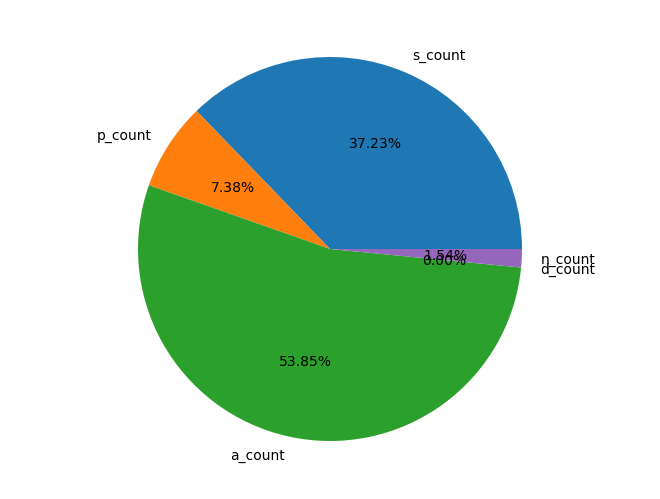

In [122]:
# Visualization 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
total_token_count = ['s_count', 'p_count', 'a_count','d_count','n_count']
data = [s_count, p_count, a_count,d_count,n_count]
ax.pie(data, labels = total_token_count,autopct='%1.2f%%')
plt.show()

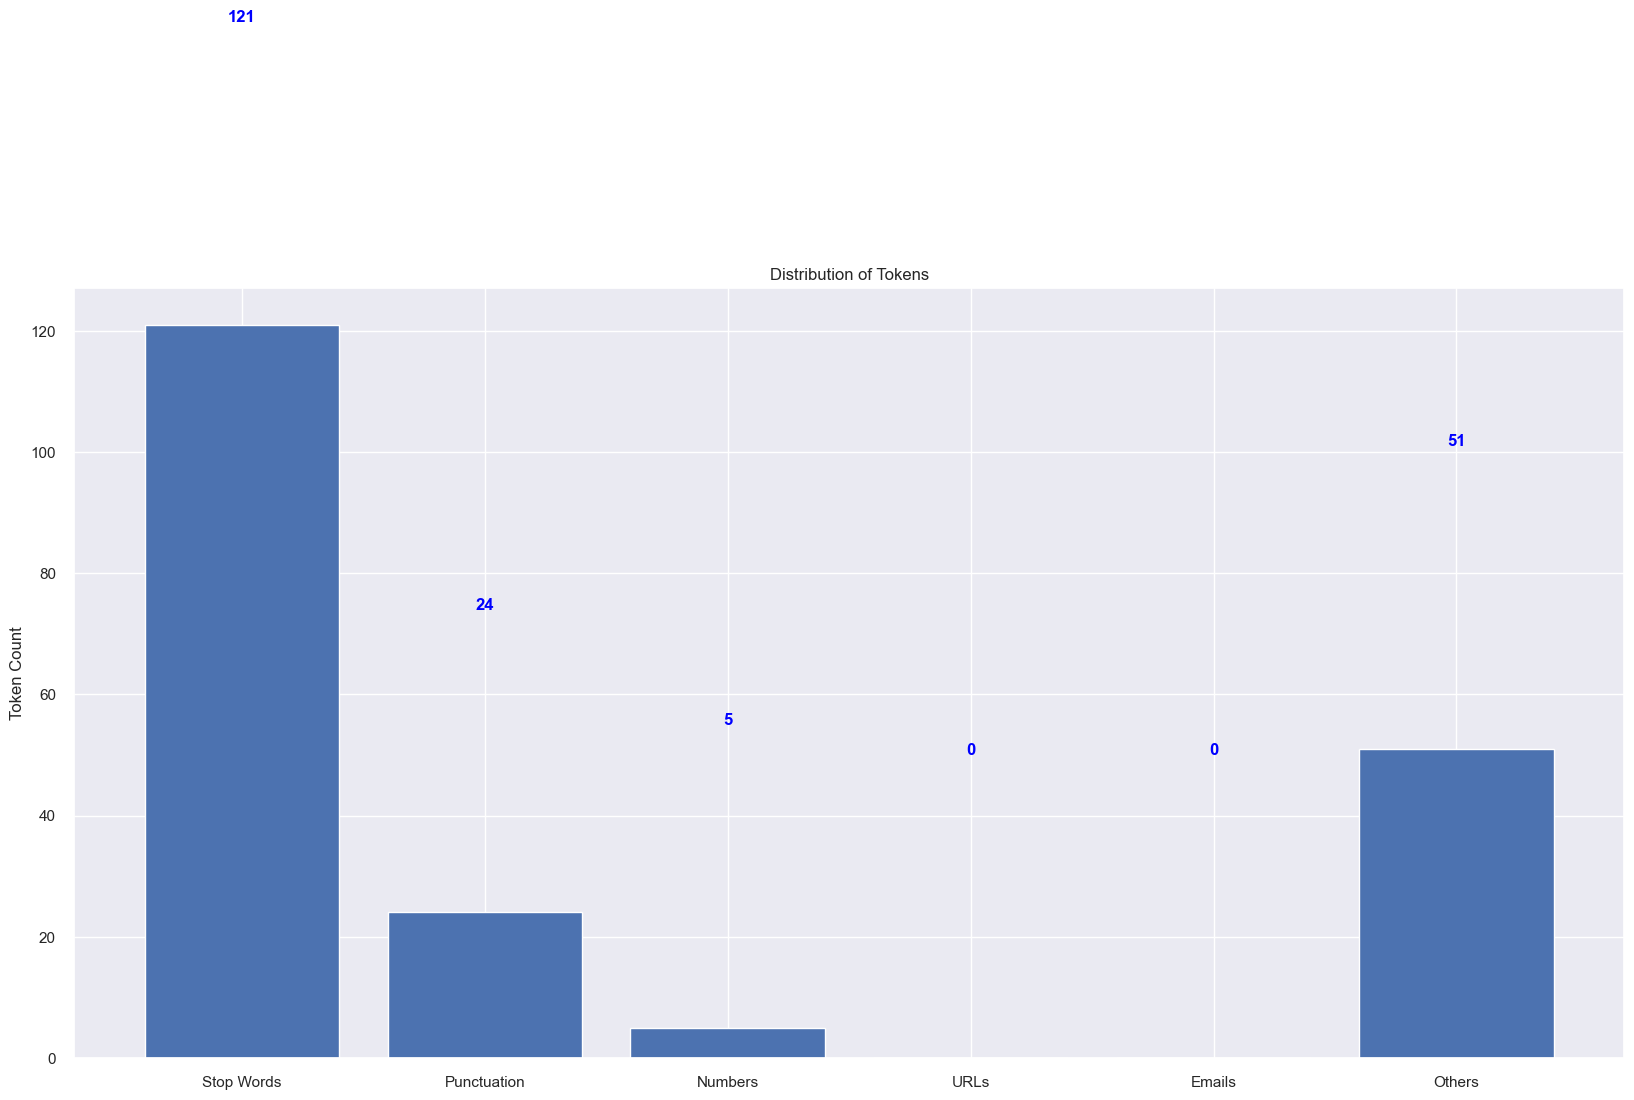

In [558]:
import matplotlib.pyplot as plt

total_token_count = ['Stop Words', 'Punctuation', 'Numbers', 'URLs', 'Emails', 'Others']
data = [s_count, p_count, n_count, url_count, email_count, token_count - (s_count + p_count + n_count + url_count + email_count)]

fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(total_token_count, data)
ax.set_ylabel('Token Count')
ax.set_title('Distribution of Tokens')

# Add number labels
for i, v in enumerate(data):
    ax.text(i, v + 50, str(v), color='blue', fontweight='bold', ha='center')

plt.show()

In [564]:
from wordcloud import WordCloud

# Concatenate all reviews into a single string
token_str = ' '.join(token for token in doc1)

# Create and generate a word cloud image
wordcloud = WordCloud(width = 1000, height = 500, background_color="white").generate(token_str)

# Display the generated image:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

TypeError: sequence item 0: expected str instance, spacy.tokens.token.Token found

In [559]:
# FORMING CLEANED DOC:

cleaned_doc=[token for token in doc1 if not token.is_stop and not token.is_punct and not token.like_num and not token.like_url and not token.like_email]

In [560]:
token_clean=0
for token in cleaned_doc:
    token_clean=token_clean+1
    print(token.text)

calculate
similarities
documents
sim
object
print
resulting
similarity
matrix
case
output
4x4
matrix
element
represents
cosine
similarity
documents
Note
MatrixSimilarity
similarity
measures
cosine
similarity
specifying
different
num_best
parameter
example
setting
num_best=1
return
document
highest
similarity
score


In [561]:
print("The length of cleaned doc is",token_clean)

The length of cleaned doc is 36


C:\Users\pc\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\pc\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\pc\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\pc\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)


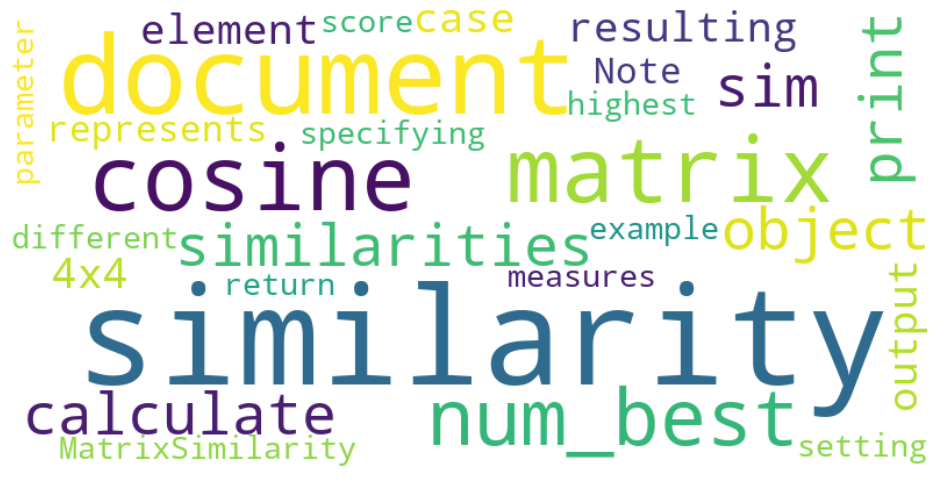

In [571]:
# assuming `cleaned_doc` is a list of spacy token objects
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join([token.text for token in cleaned_doc]))

# plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


C:\Users\pc\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\pc\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\pc\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\pc\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)


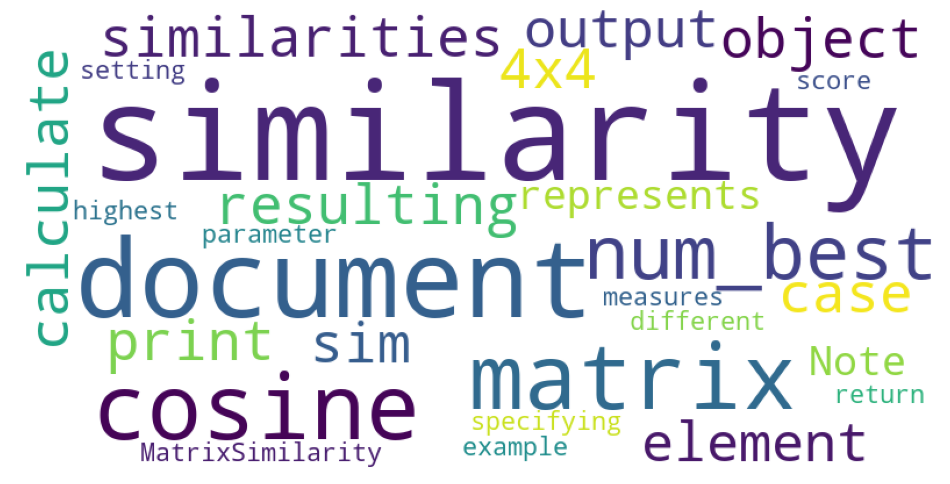

In [574]:
# assuming `preprocessed_text` is a list of preprocessed words
cleaned_doc_strings = [str(token) for token in cleaned_doc]
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(cleaned_doc_strings))

# plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


## TAGGING:

POS tagging is the process of labeling each word in a text with its corresponding part of speech, such as noun, verb, adjective, etc. This information can be useful in a variety of natural language processing tasks, such as text classification, information retrieval, and machine translation. For example, in text classification, knowing the POS tags of words can help us identify which words are most important in distinguishing between different categories of text.

In addition to POS tagging, spaCy provides a wide range of other natural language processing capabilities, such as named entity recognition, dependency parsing, and text classification. By using these tools, we can gain a deeper understanding of the structure and meaning of natural language text, which can be useful in a wide range of applications.

### Parts of Speech-POS

In [123]:
for token in doc1:
    print(token,'==>',token.pos_)

India ==> PROPN
, ==> PUNCT
a ==> DET
South ==> ADJ
Asian ==> ADJ
nation ==> NOUN
, ==> PUNCT
is ==> AUX
the ==> DET
seventh ==> ADV
- ==> PUNCT
largest ==> ADJ
country ==> NOUN
by ==> ADP
area ==> NOUN
, ==> PUNCT
the ==> DET
second ==> ADV
- ==> PUNCT
most ==> ADV
populous ==> ADJ
country ==> NOUN
with ==> ADP
over ==> ADP
1.38 ==> NUM
billion ==> NUM
people ==> NOUN
, ==> PUNCT
and ==> CCONJ
the ==> DET
most ==> ADV
populous ==> ADJ
democracy ==> NOUN
in ==> ADP
the ==> DET
world ==> NOUN
. ==> PUNCT
India ==> PROPN
boasts ==> VERB
of ==> ADP
an ==> DET
immensely ==> ADV
rich ==> ADJ
cultural ==> ADJ
heritage ==> NOUN
, ==> PUNCT
including ==> VERB
numerous ==> ADJ
languages ==> NOUN
, ==> PUNCT
traditions ==> NOUN
, ==> PUNCT
and ==> CCONJ
people ==> NOUN
. ==> PUNCT
The ==> DET
country ==> NOUN
holds ==> VERB
its ==> PRON
uniqueness ==> NOUN
in ==> ADP
its ==> PRON
diversity ==> NOUN
, ==> PUNCT
and ==> CCONJ
hence ==> ADV
has ==> AUX
adapted ==> VERB
itself ==> PRON
to ==> ADP
in

In [124]:
spacy.explain('AUX')

'auxiliary'

In [169]:
# pos count:
pos_count=doc1.count_by(spacy.attrs.POS)
pos_count

{96: 3,
 97: 24,
 90: 20,
 84: 29,
 92: 48,
 87: 9,
 86: 9,
 85: 24,
 93: 4,
 89: 10,
 100: 12,
 95: 5,
 98: 3,
 94: 1}

In [171]:
for x,y in sorted(pos_count.items()):
    print(x,doc1.vocab[x].text,y)

84 ADJ 29
85 ADP 24
86 ADV 9
87 AUX 9
89 CCONJ 10
90 DET 20
92 NOUN 48
93 NUM 4
94 PART 1
95 PRON 5
96 PROPN 3
97 PUNCT 24
98 SCONJ 3
100 VERB 12


## Visualisation of POS

In [173]:
from spacy import displacy
displacy.render(doc1,style='dep') # Dependence

In [175]:
options={'compact':'True','color':'blue'}

displacy.render(doc1,style='dep',options=options)

In [125]:
## summary of token:

In [126]:
# Total number of tokens

token_count=0
stop_count=0
punct_count=0
num_count=0
stop_list = []
for token in doc1:
    token_count=token_count+1
    if token.is_stop:
        stop_count=stop_count+1
        stop_list.append(token.text)
    if token.is_punct:
        punct_count=punct_count+1
    if token.like_num:
        num_count=num_count+1
print(' The total number of tokens:',token_count)
print('Total number of stop words in the doc:',stop_count)
print(' The total number of puncuations in the doc:',punct_count)
print(' Count of numbers in the doc:',num_count)

 The total number of tokens: 201
Total number of stop words in the doc: 80
 The total number of puncuations in the doc: 24
 Count of numbers in the doc: 5


In [127]:
tokenized_text = pd.DataFrame()

for i, token in enumerate(doc1):
    tokenized_text.loc[i, 'text'] = token.text
    tokenized_text.loc[i, 'lemma'] = token.lemma_,
    tokenized_text.loc[i, 'pos'] = token.pos_
    tokenized_text.loc[i, 'tag'] = token.tag_
    tokenized_text.loc[i, 'dep'] = token.dep_
    tokenized_text.loc[i, 'is_alpha'] = token.is_alpha
    tokenized_text.loc[i, 'is_stop'] = token.is_stop
    tokenized_text.loc[i, 'is_punctuation'] = token.is_punct

tokenized_text[25:50]

,text,lemma,pos,tag,dep,is_alpha,is_stop,is_punctuation
25,billion,"(billion,)",NUM,CD,nummod,True,False,False
26,people,"(people,)",NOUN,NNS,pobj,True,False,False
27,",","(,,)",PUNCT,",",punct,False,False,True
28,and,"(and,)",CCONJ,CC,cc,True,True,False
29,the,"(the,)",DET,DT,det,True,True,False
30,most,"(most,)",ADV,RBS,advmod,True,True,False
31,populous,"(populous,)",ADJ,JJ,amod,True,False,False
32,democracy,"(democracy,)",NOUN,NN,conj,True,False,False
33,in,"(in,)",ADP,IN,prep,True,True,False
34,the,"(the,)",DET,DT,det,True,True,False


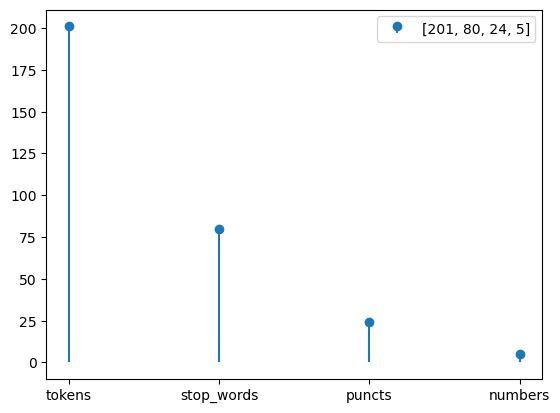

In [128]:
# visulaization of summary:
import matplotlib.pyplot as plt
figo,axeso = plt.subplots()
axeso.stem(['tokens','stop_words','puncts','numbers'], [token_count,stop_count,punct_count,num_count],
           label=[token_count,stop_count,punct_count,num_count],use_line_collection=True, basefmt=' ')
axeso.legend()
plt.show()

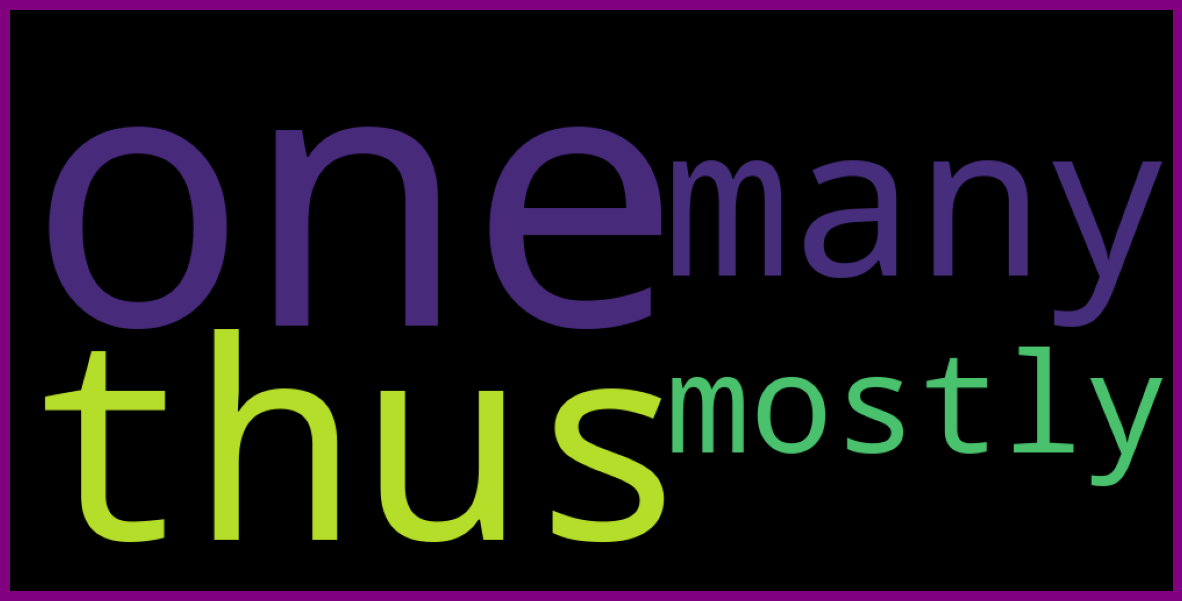

In [129]:
# Visualising - Most Common Stop Words:
from wordcloud import WordCloud
unique_string=(" ").join(stop_list)
unique_string = unique_string.lower()
wordcloud = WordCloud(width = 1000, height = 500, background_color ='black').generate(unique_string)
plt.figure(figsize=(15,8), facecolor = "purple")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

In [552]:
# EXTRA:
# LEMMATIZATION:

for token in doc1:
    print(token.text,'-',token.lemma_)

We - we
calculate - calculate
the - the
similarities - similarity
between - between
documents - document
using - use
the - the
sim - sim
object - object
and - and
print - print
the - the
resulting - result
similarity - similarity
matrix - matrix
. - .
In - in
this - this
case - case
, - ,
the - the
output - output
will - will
be - be
a - a
4x4 - 4x4
matrix - matrix
, - ,
where - where
each - each
element - element
represents - represent
the - the
cosine - cosine
similarity - similarity
between - between
two - two
documents - document
. - .
Note - note
that - that
MatrixSimilarity - MatrixSimilarity
can - can
be - be
used - use
with - with
other - other
similarity - similarity
measures - measure
besides - besides
cosine - cosine
similarity - similarity
by - by
specifying - specify
a - a
different - different
num_best - num_b
parameter - parameter
. - .
For - for
example - example
, - ,
setting - set
num_best=1 - num_best=1
will - will
return - return
the - the
document - document
with -

In [538]:
# EXTRA:
# Visualisation of POS:

#NOUN_COUNT

noun_count=0

for token in doc1:
    if not token.is_stop and not token.is_punct and not token.is_space and not token.like_num and not token.like_url and not token.like_email :
        if token.pos_=='NOUN':
            noun_count=noun_count+1
            print(token.text,'====>',token.pos_)
            
# poS=VERB

verb_count=0

for token in doc1:
    if not token.is_stop and not token.is_punct and not token.is_space and not token.like_num and not token.like_url and not token.like_email  :
        if token.pos_=='VERB':
            verb_count=verb_count+1
            print(token.text,'====>',token.pos_)
            
# poS=PROPN

propn_count=0

for token in doc1:
    if not token.is_stop and not token.is_punct and not token.is_space and not token.like_num and not token.like_url and not token.like_email  :
        if token.pos_=='PROPN':
            propn_count=propn_count+1
            print(token.text,'====>',token.pos_)
            
# poS=ADJ

adj_count=0
for token in doc1:
    if not token.is_stop and not token.is_punct and not token.is_space and not token.like_num and not token.like_url and not token.like_email   :
        if token.pos_=='ADJ':
            adj_count=adj_count+1
            print(token.text,'====>',token.pos_)
print(' The count of tokens with PoS as ADJ:',adj_count)

# poS=ADV

adv_count=0
for token in doc1:
    if not token.is_stop and not token.is_punct and not token.is_space and not token.like_num and not token.like_url and not token.like_email   :
        if token.pos_=='ADV':
            adv_count=adv_count+1
            print(token.text,'====>',token.pos_)

pos_dict={'noun':noun_count,'verb':verb_count,'propn':propn_count,'adj':adj_count,'adv':adv_count}


similarities ====> NOUN
documents ====> NOUN
object ====> NOUN
similarity ====> NOUN
matrix ====> NOUN
case ====> NOUN
output ====> NOUN
matrix ====> NOUN
element ====> NOUN
similarity ====> NOUN
documents ====> NOUN
similarity ====> NOUN
measures ====> NOUN
cosine ====> NOUN
similarity ====> NOUN
parameter ====> NOUN
example ====> NOUN
document ====> NOUN
similarity ====> NOUN
score ====> NOUN
calculate ====> VERB
print ====> VERB
resulting ====> VERB
represents ====> VERB
Note ====> VERB
specifying ====> VERB
setting ====> VERB
return ====> VERB
MatrixSimilarity ====> PROPN
num_best=1 ====> PROPN
sim ====> ADJ
cosine ====> ADJ
different ====> ADJ
num_best ====> ADJ
highest ====> ADJ
 The count of tokens with PoS as ADJ: 5


In [539]:
import pandas as pd
pos_series=pd.Series(pos_dict)
pos_series

noun     20
verb      8
propn     2
adj       5
adv       0
dtype: int64

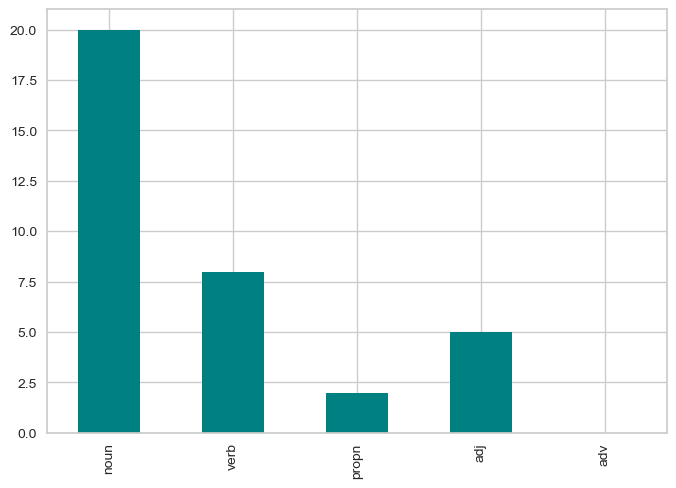

In [540]:
pos_series.plot(kind='bar',color='teal');

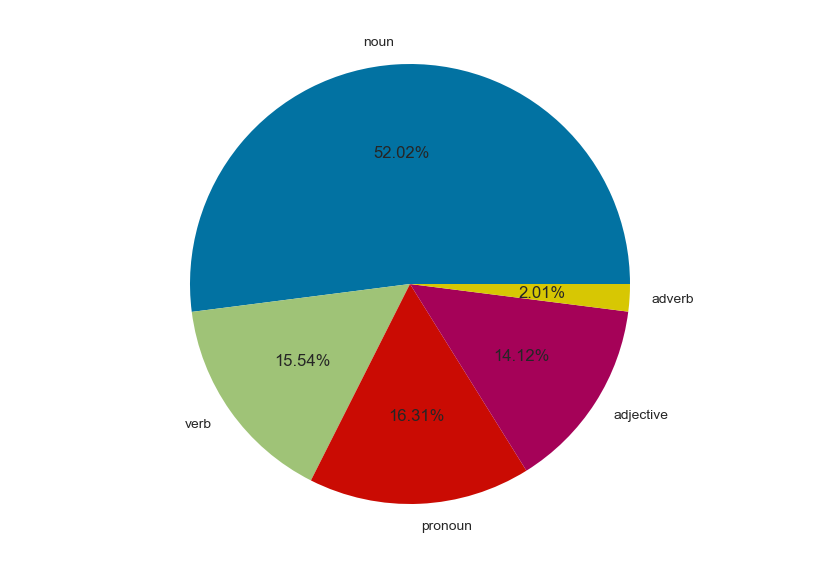

In [541]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
pos = ['noun', 'verb', 'pronoun', 'adjective', 'adverb']
data = [1426,426,447,387,55]
ax.pie(data, labels = pos,autopct='%1.2f%%')
plt.show()

## STORE TOKEN IN A DATAFRAME

In [130]:
# Creating columns for the DF

cols=['Token','POS','Explain_POS','Tag','Explain_Tag']
cols

['Token', 'POS', 'Explain_POS', 'Tag', 'Explain_Tag']

In [131]:
rows=[]
for token in doc1:
    row=token,token.pos_,spacy.explain(token.pos_),token.tag_,spacy.explain(token.tag_)
    rows.append(row)
rows

[(India, 'PROPN', 'proper noun', 'NNP', 'noun, proper singular'),
 (,, 'PUNCT', 'punctuation', ',', 'punctuation mark, comma'),
 (a, 'DET', 'determiner', 'DT', 'determiner'),
 (South,
  'ADJ',
  'adjective',
  'JJ',
  'adjective (English), other noun-modifier (Chinese)'),
 (Asian,
  'ADJ',
  'adjective',
  'JJ',
  'adjective (English), other noun-modifier (Chinese)'),
 (nation, 'NOUN', 'noun', 'NN', 'noun, singular or mass'),
 (,, 'PUNCT', 'punctuation', ',', 'punctuation mark, comma'),
 (is, 'AUX', 'auxiliary', 'VBZ', 'verb, 3rd person singular present'),
 (the, 'DET', 'determiner', 'DT', 'determiner'),
 (seventh, 'ADV', 'adverb', 'RB', 'adverb'),
 (-, 'PUNCT', 'punctuation', 'HYPH', 'punctuation mark, hyphen'),
 (largest, 'ADJ', 'adjective', 'JJS', 'adjective, superlative'),
 (country, 'NOUN', 'noun', 'NN', 'noun, singular or mass'),
 (by, 'ADP', 'adposition', 'IN', 'conjunction, subordinating or preposition'),
 (area, 'NOUN', 'noun', 'NN', 'noun, singular or mass'),
 (,, 'PUNCT', 'p

In [132]:
import pandas as pd
token_df=pd.DataFrame(rows,columns=cols)
token_df

,Token,POS,Explain_POS,Tag,Explain_Tag
0,India,PROPN,proper noun,NNP,"noun, proper singular"
1,",",PUNCT,punctuation,",","punctuation mark, comma"
2,a,DET,determiner,DT,determiner
3,South,ADJ,adjective,JJ,"adjective (English), other noun-modifier (Chin..."
4,Asian,ADJ,adjective,JJ,"adjective (English), other noun-modifier (Chin..."
...,...,...,...,...,...
196,ample,ADJ,adjective,JJ,"adjective (English), other noun-modifier (Chin..."
197,source,NOUN,noun,NN,"noun, singular or mass"
198,of,ADP,adposition,IN,"conjunction, subordinating or preposition"
199,manpower,NOUN,noun,NN,"noun, singular or mass"


In [133]:
token_df['POS'].value_counts()

NOUN     48
ADJ      29
PUNCT    24
ADP      24
DET      20
VERB     12
CCONJ    10
AUX       9
ADV       9
PRON      5
NUM       4
PROPN     3
SCONJ     3
PART      1
Name: POS, dtype: int64

## COnverting a text into a DF with tokens, pos 

In [184]:
text_df

,Sentence,Token,POS
0,Today is Monday,"[Today, is, Monday]","[NOUN, AUX, PROPN]"
1,Tomorrow is Tuesday,"[Tomorrow, is, Tuesday]","[NOUN, AUX, PROPN]"
2,Yesterday was a holiday,"[Yesterday, was, a, holiday]","[NOUN, AUX, DET, NOUN]"


In [185]:
token=[]
for sent in nlp.pipe(text_df['Sentence']):
    if sent.has_annotation('DEP'):
        token.append([word.text for word in sent] )
token

[['Today', 'is', 'Monday'],
 ['Tomorrow', 'is', 'Tuesday'],
 ['Yesterday', 'was', 'a', 'holiday']]

In [186]:
token=[]
pos=[]
for sent in nlp.pipe(text_df['Sentence']):
    if sent.has_annotation('DEP'):
        token.append([word.text for word in sent] )
        pos.append([word.pos_ for word in sent])
print(token)
print(pos)

[['Today', 'is', 'Monday'], ['Tomorrow', 'is', 'Tuesday'], ['Yesterday', 'was', 'a', 'holiday']]
[['NOUN', 'AUX', 'PROPN'], ['NOUN', 'AUX', 'PROPN'], ['NOUN', 'AUX', 'DET', 'NOUN']]


In [187]:
# Updating text_df

text_df['Token']=token
text_df['POS']=pos

In [188]:
text_df

,Sentence,Token,POS
0,Today is Monday,"[Today, is, Monday]","[NOUN, AUX, PROPN]"
1,Tomorrow is Tuesday,"[Tomorrow, is, Tuesday]","[NOUN, AUX, PROPN]"
2,Yesterday was a holiday,"[Yesterday, was, a, holiday]","[NOUN, AUX, DET, NOUN]"
